<a href="https://colab.research.google.com/github/ladytriana/MetnumProjectBaru/blob/main/METNUM_TUGAS_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PROGRAM ANALISIS ARUS LALU LINTAS - METODE GAUSS JORDAN
-------------------------------------------------------
>>> MATRIKS AWAL (AUGMENTED) <<<
[[   1.    1.    0.    0.  600.]
 [   1.    0.   -1.    0. -200.]
 [   0.    1.    0.   -1.  100.]
 [   0.    0.    0.    1.   50.]]
Iterasi ke-1 (Pivot di baris 0):
[[   1.    1.    0.    0.  600.]
 [   0.   -1.   -1.    0. -800.]
 [   0.    1.    0.   -1.  100.]
 [   0.    0.    0.    1.   50.]]
--------------------------------------------------
Iterasi ke-2 (Pivot di baris 1):
[[   1.    0.   -1.    0. -200.]
 [  -0.    1.    1.   -0.  800.]
 [   0.    0.   -1.   -1. -700.]
 [   0.    0.    0.    1.   50.]]
--------------------------------------------------
Iterasi ke-3 (Pivot di baris 2):
[[  1.   0.   0.   1. 500.]
 [  0.   1.   0.  -1. 100.]
 [ -0.  -0.   1.   1. 700.]
 [  0.   0.   0.   1.  50.]]
--------------------------------------------------
Iterasi ke-4 (Pivot di baris 3):
[[  1.   0.   0.   0. 450.]
 [  0.   1.   0.   0. 150.]
 [

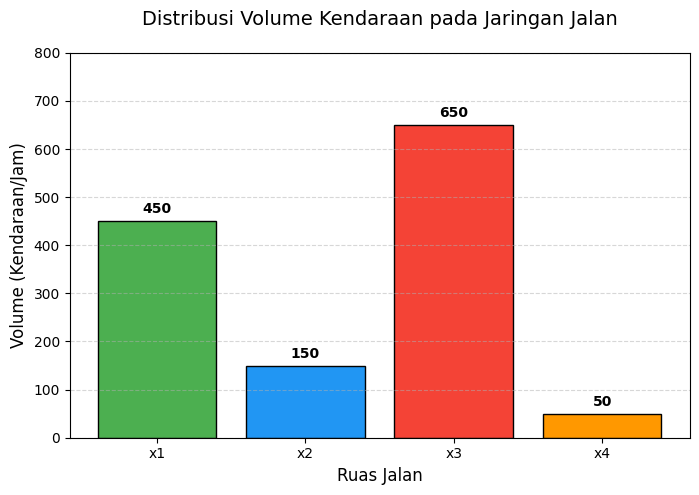

In [ ]:
import numpy as np
import matplotlib.pyplot as plt # Import library untuk grafik

def gauss_jordan_solver(A, B):
    """
    Menyelesaikan SPL Ax = B menggunakan metode Gauss-Jordan.
    Output langsung berupa nilai variabel x.
    """
    n = len(B)
    # Menggabungkan Matriks A dan B (Augmented Matrix)
    M = np.hstack([A, B.reshape(-1, 1)]).astype(float)

    print(">>> MATRIKS AWAL (AUGMENTED) <<<")
    print(M)
    print("=" * 50)

    # PROSES ELIMINASI GAUSS-JORDAN
    for i in range(n):
        # 1. Cek Pivot (mencegah pembagian dengan nol)
        if M[i][i] == 0:
            # Jika pivot 0, coba tukar dengan baris di bawahnya
            tukar = False
            for k in range(i+1, n):
                if M[k][i] != 0:
                    M[[i, k]] = M[[k, i]] # Tukar baris
                    tukar = True
                    break
            if not tukar:
                print(f"Error: Sistem singular di baris {i}.")
                return None

        # 2. Normalisasi Baris Pivot (agar diagonal menjadi 1)
        pivot_val = M[i][i]
        M[i] = M[i] / pivot_val

        # 3. Eliminasi Baris Lain (Membuat 0 elemen di atas dan bawah pivot)
        for j in range(n):
            if i != j:
                factor = M[j][i]
                M[j] = M[j] - (factor * M[i])

        print(f"Iterasi ke-{i+1} (Pivot di baris {i}):")
        print(M)
        print("-" * 50)

    # Ambil kolom terakhir sebagai solusi
    solusi = M[:, -1]
    return solusi

# --- STUDI KASUS: 4 PERSIMPANGAN (DENGAN SENSOR x4=50) ---
# Matriks Koefisien (A)
A_matrix = np.array([
    [1, 1, 0, 0],   # Simpang A: x1 + x2 = 600
    [1, 0, -1, 0],  # Simpang B: x1 - x3 = -200
    [0, 1, 0, -1],  # Simpang C: x2 - x4 = 100
    [0, 0, 0, 1]    # Sensor x4: x4 = 50 (Boundary Condition)
])

# Vektor Konstanta (B)
B_vector = np.array([600, -200, 100, 50])

# --- EKSEKUSI PROGRAM ---
print("PROGRAM ANALISIS ARUS LALU LINTAS - METODE GAUSS JORDAN")
print("-------------------------------------------------------")

hasil_arus = gauss_jordan_solver(A_matrix, B_vector)

if hasil_arus is not None:
    print("\n>>> HASIL AKHIR PERHITUNGAN VOLUME KENDARAAN <<<")
    for k, val in enumerate(hasil_arus):
        print(f"Ruas Jalan x{k+1} : {val:.2f} kendaraan/jam")

    print("\n[Validasi Matematis]")
    print(f"Cek Simpang A (x1 + x2): {hasil_arus[0]:.2f} + {hasil_arus[1]:.2f} = {hasil_arus[0]+hasil_arus[1]:.2f}")
    if abs((hasil_arus[0]+hasil_arus[1]) - 600) < 0.01:
        print("Status: VALID (Sesuai)")

    # ==========================================
    # BAGIAN BARU: KODE UNTUK MEMBUAT GRAFIK
    # ==========================================
    print("\n[Info] Menampilkan Visualisasi Data...")

    # Data untuk sumbu X dan Y
    labels = ['x1', 'x2', 'x3', 'x4']
    values = hasil_arus

    # Membuat Grafik
    plt.figure(figsize=(8, 5)) # Ukuran gambar

    # Memberi warna berbeda: x3 merah (padat), lainnya biru/hijau
    colors = ['#4CAF50', '#2196F3', '#F44336', '#FF9800']
    bars = plt.bar(labels, values, color=colors, edgecolor='black')

    # Menambahkan angka di atas batang
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 10,
                 f'{int(height)}',
                 ha='center', va='bottom', fontweight='bold')

    # Mempercantik tampilan
    plt.title('Distribusi Volume Kendaraan pada Jaringan Jalan', fontsize=14, pad=20)
    plt.xlabel('Ruas Jalan', fontsize=12)
    plt.ylabel('Volume (Kendaraan/Jam)', fontsize=12)
    plt.ylim(0, max(values) + 150) # Memberi ruang kosong di atas grafik
    plt.grid(axis='y', linestyle='--', alpha=0.5) # Garis bantu putus-putus

    # Menampilkan grafik
    plt.show()